In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

In [2]:
data = pd.read_csv("dataset/train.csv")
data.head()

/tmp/ipykernel_7497/1397670170.py:1: DtypeWarning: Columns (28,36,44,48,53,57,62,65,68,71) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset/train.csv")


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Unnamed: 83
0,e5aa3c9b74b4cfc4aea9d651be197563,win8defender,1.1.15100.1,4.18.1806.18062,1.273.484.0,0,7.0,0,NaN,47238.0,...,1,NaN,0.0,1,0,0.0,0.0,1.0,0.0,NaN
1,d58b8ce91642b73c6f347b458b0ede2b,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1494.0,0,7.0,0,NaN,41571.0,...,0,NaN,0.0,0,0,0.0,1.0,11.0,0.0,NaN
2,c4be9ff577713adc3d0f4a4f6fb9c238,win8defender,1.1.15200.1,4.18.1807.18075,1.275.598.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,1,0,0.0,1.0,3.0,0.0,NaN
3,e80664f5fca5a56b630f539384a36c10,win8defender,1.1.15200.1,4.9.10586.1106,1.275.1329.0,0,7.0,0,NaN,53447.0,...,1,0.0,0.0,0,0,0.0,1.0,11.0,1.0,NaN
4,c14275d506c268c021db71d8d561b9b2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,0,7.0,0,NaN,53447.0,...,0,0.0,0.0,0,0,0.0,0.0,15.0,0.0,NaN


EDA Analysis

In [3]:
import pandas as pd
percent = (data.isnull().sum() / data.shape[0]) * 100
new_train = pd.DataFrame(data=percent, columns=['Percentofnullvalues'])
new_train = new_train.sort_values(by='Percentofnullvalues', ascending=False)
print(new_train.head(15))


                                       Percentofnullvalues
Unnamed: 83                                      99.994011
PuaMode                                          99.982914
Census_ProcessorClass                            99.601747
DefaultBrowsersIdentifier                        94.844909
Census_IsFlightingInternal                       82.679090
Census_InternalBatteryType                       70.460254
Census_ThresholdOptIn                            63.103940
Census_IsWIMBootEnabled                          63.008120
SmartScreen                                      36.468216
OrganizationIdentifier                           30.994663
SMode                                             6.742113
CityIdentifier                                    3.676219
Wdft_RegionIdentifier                             3.320769
Wdft_IsGamer                                      3.320593
Census_InternalBatteryNumberOfCharges             2.847480


In [4]:
data.isna().sum()

MachineIdentifier                               0
ProductName                                     0
EngineVersion                                   0
AppVersion                                      0
AvSigVersion                                    0
                                            ...  
Census_IsAlwaysOnAlwaysConnectedCapable      4420
Wdft_IsGamer                                18852
Wdft_RegionIdentifier                       18853
HasDetections                                   1
Unnamed: 83                                567696
Length: 84, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567730 entries, 0 to 567729
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  567730 non-null  object 
 1   ProductName                                        567730 non-null  object 
 2   EngineVersion                                      567730 non-null  object 
 3   AppVersion                                         567730 non-null  object 
 4   AvSigVersion                                       567730 non-null  object 
 5   IsBeta                                             567730 non-null  int64  
 6   RtpStateBitfield                                   565568 non-null  float64
 7   IsSxsPassiveMode                                   567730 non-null  int64  
 8   DefaultBrowsersIdentifier                          29267 non-null   float6

In [6]:
def remove_columns(data):
    ''' Computing percent of null values in a dataset based on the feature and removing those features having 70 or more than 70 percent of null values '''
    columns_to_be_removed = []
    percent = (data.isnull().sum()/data.shape[0]) * 100
    for col in data.columns:
        if percent.loc[col] >= 80:
            columns_to_be_removed.append(col)
    new_data = data.drop(columns=columns_to_be_removed)
    return new_data

In [7]:
data = remove_columns(data)

In [8]:
# data.to_csv("dataset/train_U.csv",index=False)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567730 entries, 0 to 567729
Data columns (total 79 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  567730 non-null  object 
 1   ProductName                                        567730 non-null  object 
 2   EngineVersion                                      567730 non-null  object 
 3   AppVersion                                         567730 non-null  object 
 4   AvSigVersion                                       567730 non-null  object 
 5   IsBeta                                             567730 non-null  int64  
 6   RtpStateBitfield                                   565568 non-null  float64
 7   IsSxsPassiveMode                                   567730 non-null  int64  
 8   AVProductStatesIdentifier                          565004 non-null  float6

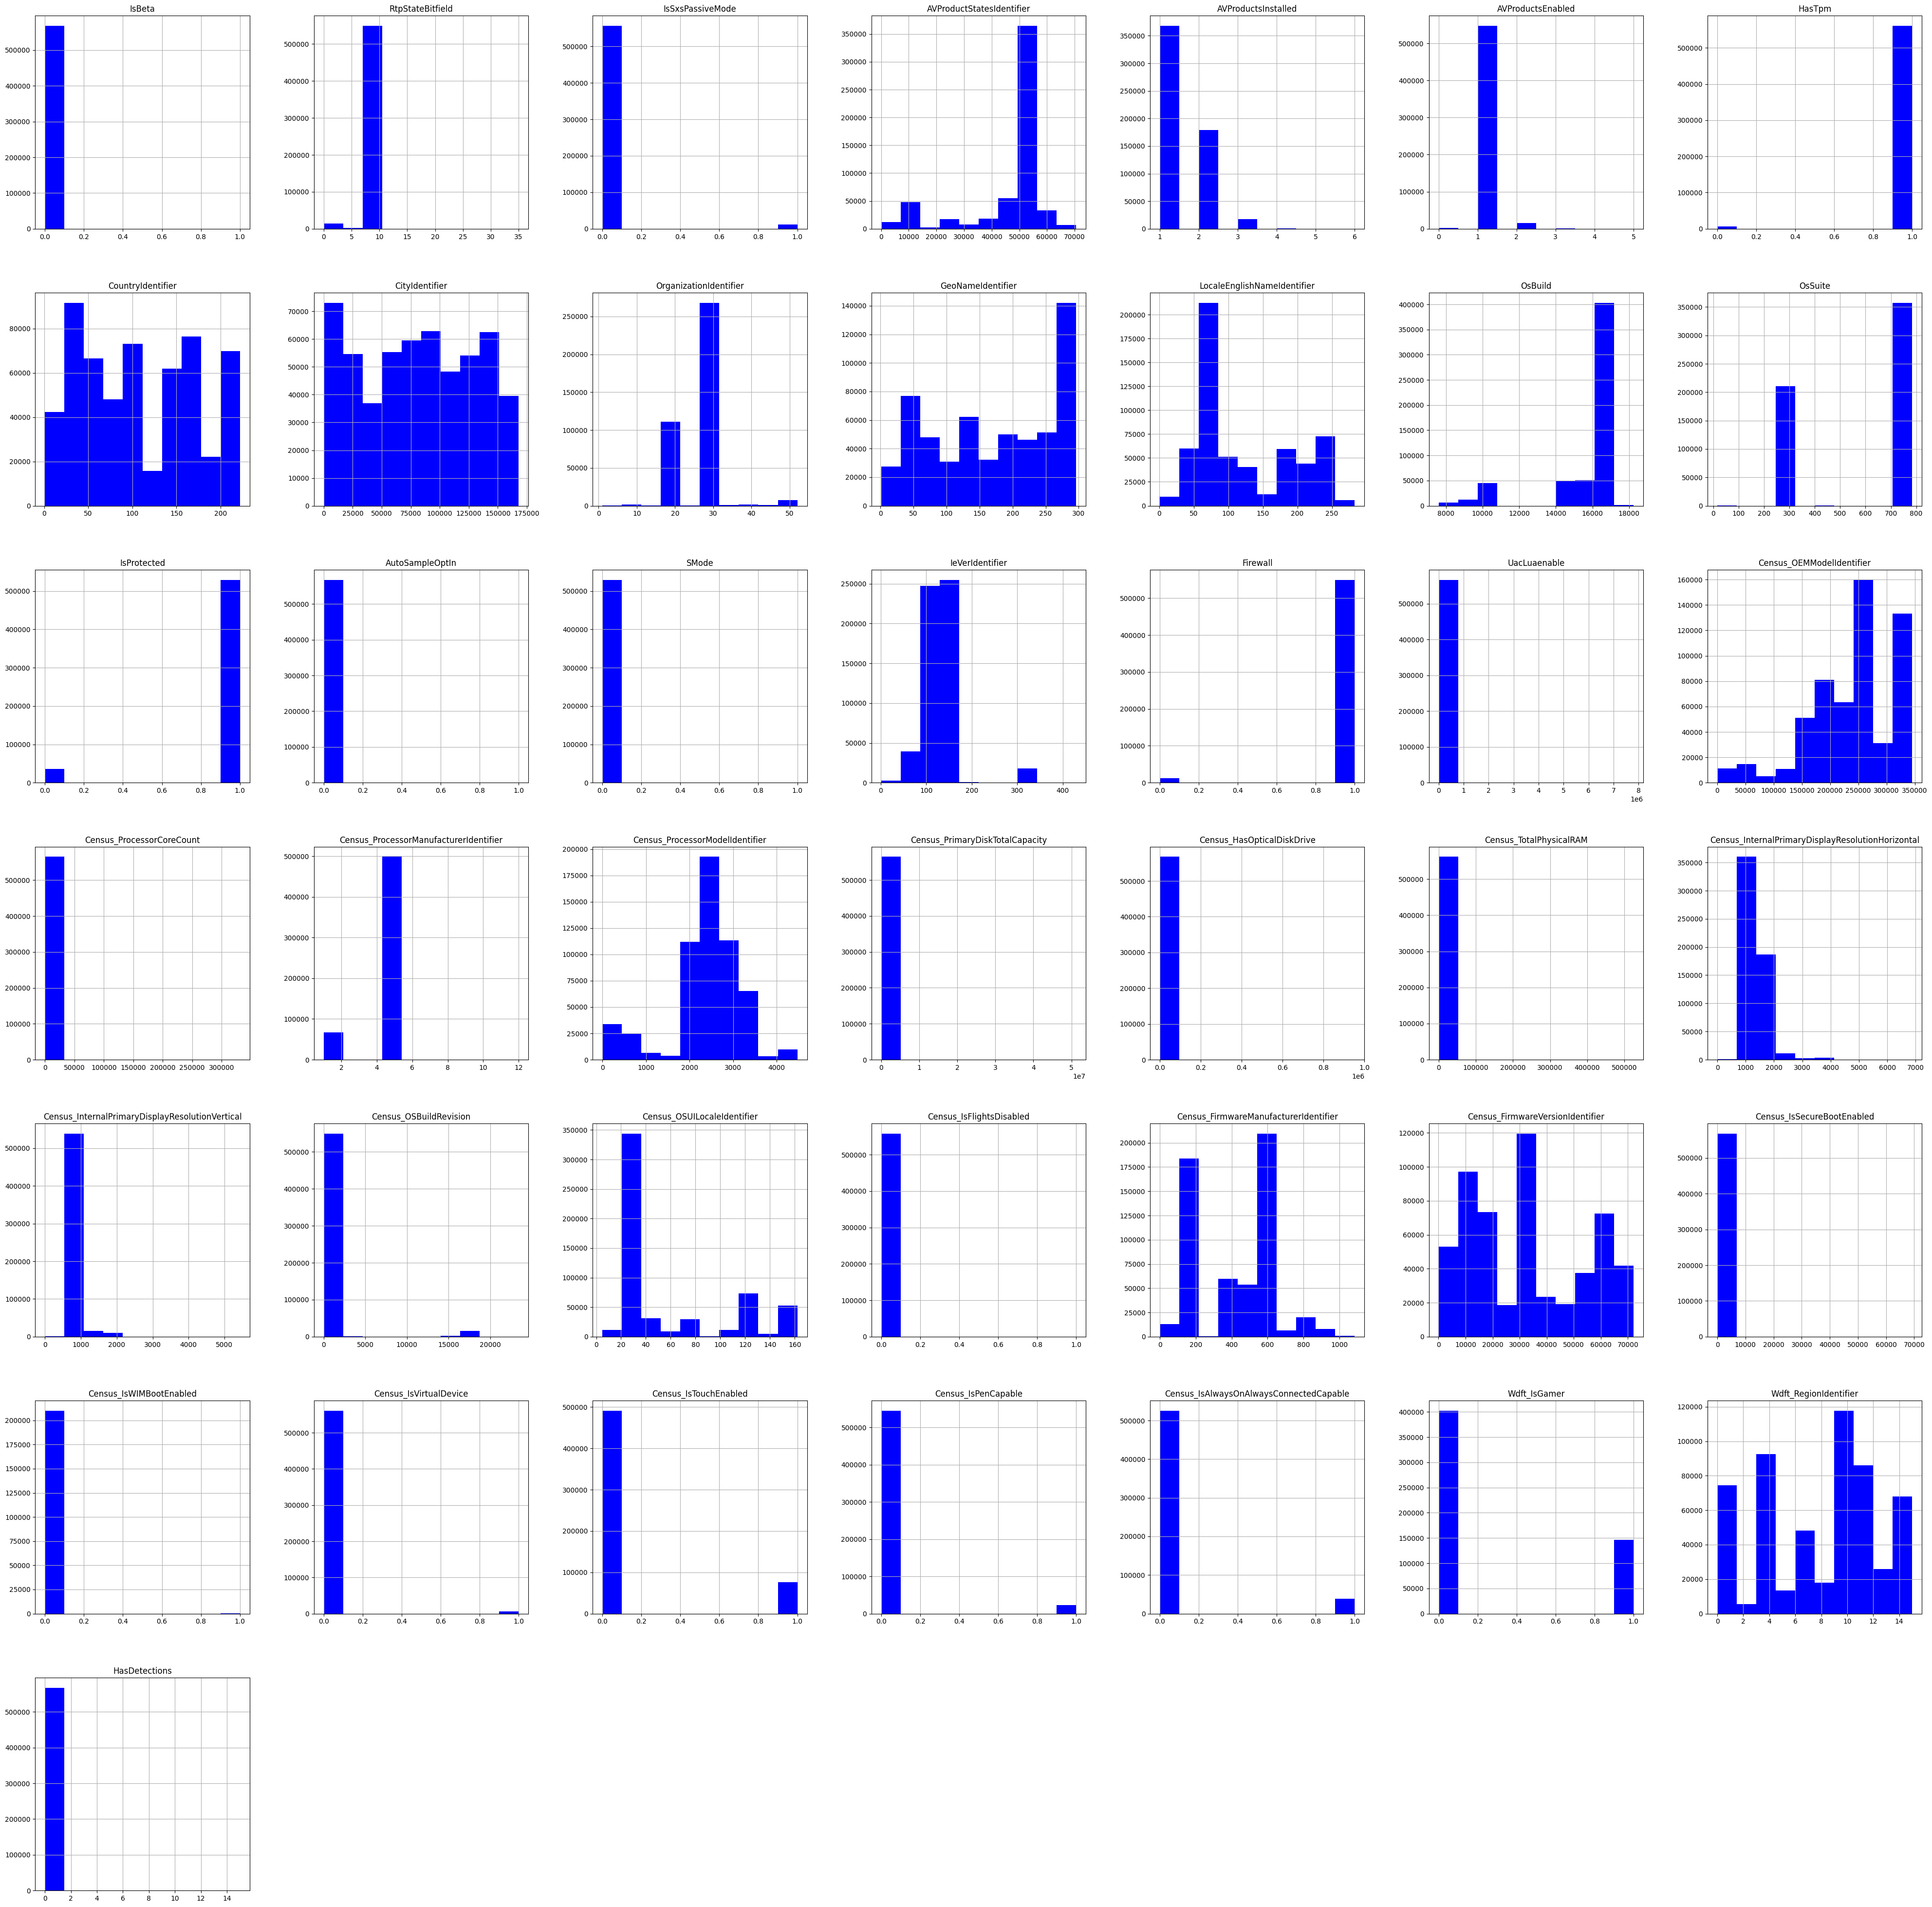

In [9]:
# visualizing the histograms of each column of the dataset
data.hist(figsize=(50, 50), color='blue', label='Histogram')
plt.show()

In [10]:
data = data.drop(columns=["MachineIdentifier"],inplace=False, errors='ignore')

In [11]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)  # Convert mixed-type columns to strings
        data[column] = label_encoder.fit_transform(data[column])

In [12]:
#Finding correlation matrix for target variable ('HasDetections') & creating a heatmap for the correlations with 'HasDetections'
corelation_matrix = data.corr()
HasDetections_corr = corelation_matrix[['HasDetections']]  # This gives us a DataFrame with one column

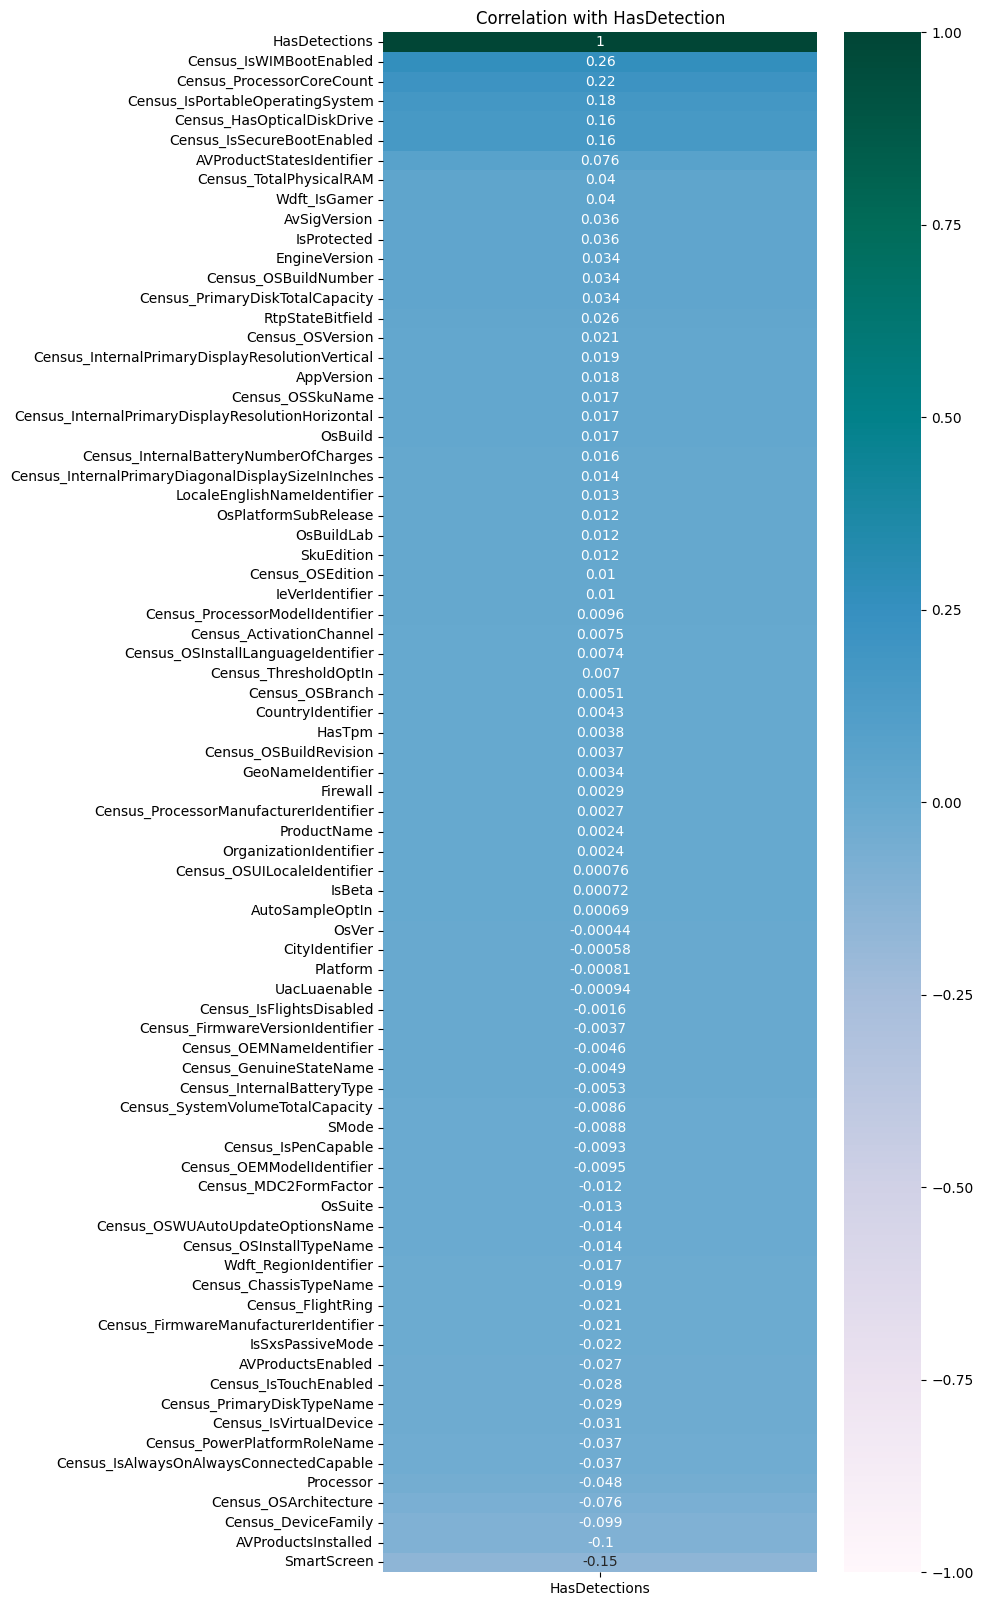

In [13]:
plt.figure(figsize=(7, 20))
sns.heatmap(HasDetections_corr.sort_values(by='HasDetections', ascending=False), annot=True, cmap='PuBuGn', vmin=-1, vmax=1)
plt.title("Correlation with HasDetection")
plt.show()

In [14]:
HasDetections_corr_ranked = HasDetections_corr['HasDetections'].abs().sort_values(ascending=False)
HasDetections_corr_ranked

HasDetections                       1.000000
Census_IsWIMBootEnabled             0.262677
Census_ProcessorCoreCount           0.216947
Census_IsPortableOperatingSystem    0.179676
Census_HasOpticalDiskDrive          0.163016
                                      ...   
Census_OSUILocaleIdentifier         0.000765
IsBeta                              0.000717
AutoSampleOptIn                     0.000690
CityIdentifier                      0.000580
OsVer                               0.000436
Name: HasDetections, Length: 78, dtype: float64

In [15]:
threshold = 0.01
correlated_columns = HasDetections_corr[abs(HasDetections_corr['HasDetections']) >= threshold]
column_names = correlated_columns.index.tolist()
print("Columns with correlation score >= 0.01:")
print(column_names)

Columns with correlation score >= 0.01:
['EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'LocaleEnglishNameIdentifier', 'Processor', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IsProtected', 'IeVerIdentifier', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_ProcessorCoreCount', 'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_ChassisTypeName', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryNumberOfCharges', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBuildNumber', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Cen

In [16]:
new_data = data = data.drop(columns=[col for col in data.columns if col not in column_names])

In [17]:
new_data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,LocaleEnglishNameIdentifier,Processor,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,46,43,6264,7.0,0,47238.0,2.0,1.0,246,1,...,4,93.0,1,NaN,0.0,1,0.0,0.0,1.0,0.0
1,46,49,6087,7.0,0,41571.0,2.0,1.0,251,1,...,4,628.0,0,NaN,0.0,0,0.0,1.0,11.0,0.0
2,47,49,6740,7.0,0,53447.0,1.0,1.0,134,1,...,4,142.0,0,NaN,0.0,1,0.0,1.0,3.0,0.0
3,47,81,6449,7.0,0,53447.0,1.0,1.0,251,1,...,4,299.0,1,0.0,0.0,0,0.0,1.0,11.0,1.0
4,46,49,6072,7.0,0,53447.0,1.0,1.0,124,1,...,7,NaN,0,0.0,0.0,0,0.0,0.0,15.0,0.0


In [18]:
new_data = new_data.dropna()

In [19]:
value_counts = data.apply(lambda x: x.value_counts(normalize=True).get(1, 0))
percentage_repeated = value_counts * 100
print("Percentage of repeated values in each column:")
print(percentage_repeated)

Percentage of repeated values in each column:
EngineVersion                                         0.000176
AppVersion                                            0.083490
AvSigVersion                                          0.000176
RtpStateBitfield                                      0.019096
IsSxsPassiveMode                                      2.049918
AVProductStatesIdentifier                             0.000000
AVProductsInstalled                                  65.113344
AVProductsEnabled                                    96.823385
LocaleEnglishNameIdentifier                           0.005989
Processor                                            89.428602
OsBuild                                               0.000000
OsSuite                                               0.000000
OsPlatformSubRelease                                  8.581544
OsBuildLab                                            0.026949
SkuEdition                                            0.448629
IsProtect

In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201617 entries, 3 to 567729
Data columns (total 49 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      201617 non-null  int64  
 1   AppVersion                                         201617 non-null  int64  
 2   AvSigVersion                                       201617 non-null  int64  
 3   RtpStateBitfield                                   201617 non-null  float64
 4   IsSxsPassiveMode                                   201617 non-null  int64  
 5   AVProductStatesIdentifier                          201617 non-null  float64
 6   AVProductsInstalled                                201617 non-null  float64
 7   AVProductsEnabled                                  201617 non-null  float64
 8   LocaleEnglishNameIdentifier                        201617 non-null  int64  
 9 

In [21]:
unique_values = new_data["HasDetections"].value_counts()
print(unique_values)

HasDetections
0.0    171871
1.0     29746
Name: count, dtype: int64


In [22]:
has_detections_0 = new_data[new_data["HasDetections"] == 0].head(29746)
has_detections_1 = new_data[new_data["HasDetections"] == 1].head(29746)
new_dataframe = pd.concat([has_detections_0, has_detections_1])

In [25]:
unique_values = new_dataframe["HasDetections"].value_counts()
print(unique_values)

HasDetections
0.0    29746
1.0    29746
Name: count, dtype: int64


In [26]:
X = new_dataframe.drop(columns=["HasDetections"])
y = new_dataframe["HasDetections"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(f"""

    Length of training data {len(X_train)}
    Length of training label {len(y_train)}
    Length of test data {len(X_test)}
    Length of test label {len(y_test)}

    """)



    Length of training data 47593
    Length of training label 47593
    Length of test data 11899
    Length of test label 11899

    


/home/tamim-pc/anaconda3/envs/work/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. Training time: 0.7913720607757568
2. Resource Usage (Max RSS in KB): 1763192
3. Hyper-parameter space exploration: N/A (Not applicable for Logistic Regression)
4. Learning curve: N/A (Not typically used for Logistic Regression)
5. Effects of the regularizers: Analyze regularization effects if needed
6. Metrics:
   - Accuracy: 0.5576098831834608
   - Precision: 0.5565610859728507
   - Recall: 0.613568340538743
   - F1 Score: 0.5836760518823156
   - AUC: 0.5569965746873834


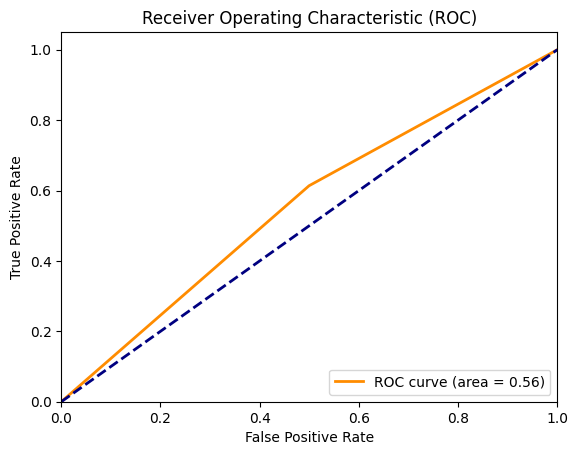

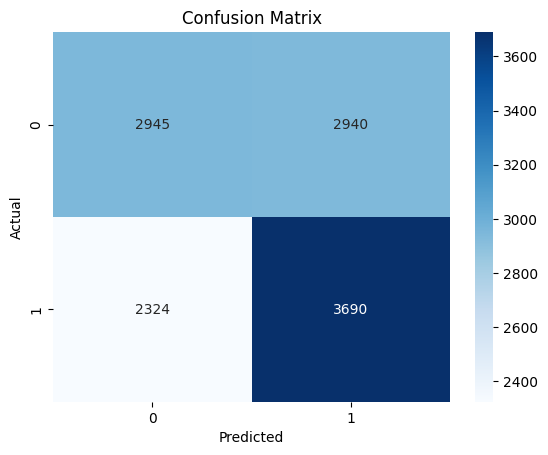

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix  # Add this import
import time
import resource
import matplotlib.pyplot as plt  # Fix the import statement for matplotlib
import seaborn as sns  # Add this import for creating the confusion matrix heatmap

start_time = time.time()
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

training_time = time.time() - start_time
memory_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print and display metrics
print("1. Training time:", training_time)
print("2. Resource Usage (Max RSS in KB):", memory_usage)
print("3. Hyper-parameter space exploration: N/A (Not applicable for Logistic Regression)")
print("4. Learning curve: N/A (Not typically used for Logistic Regression)")
print("5. Effects of the regularizers: Analyze regularization effects if needed")
print("6. Metrics:")
print("   - Accuracy:", accuracy)
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - AUC:", roc_auc)

# Optionally, plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training time: 0.7913720607757568
Accuracy: 0.5720648794016304
Precision: 0.5741634491634492
Recall: 0.5934486198869305
F1 Score: 0.5836467702371219
AUC: 0.5718305121524713


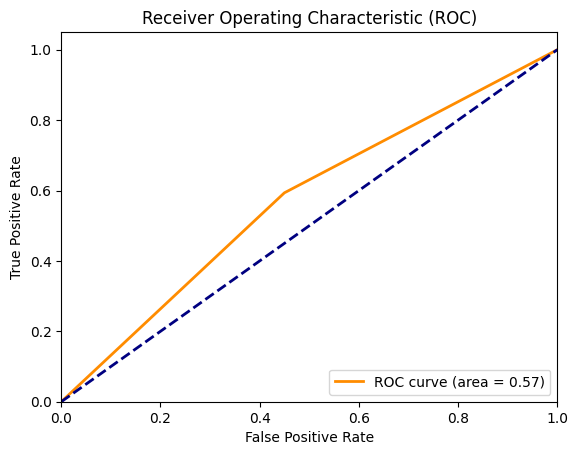

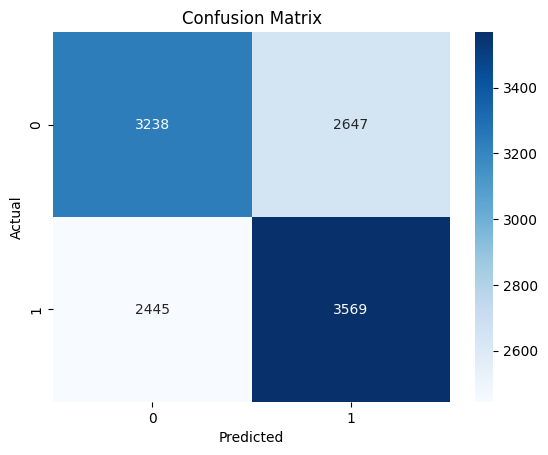

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


# Create and fit the KNN model
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print and display metrics
print("Training time:", training_time)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)

# # Plot the confusion matrix as a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# Optionally, plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.linear_model import SGDClassifier

svm_model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.689663723836921


/home/tamim-pc/anaconda3/envs/work/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


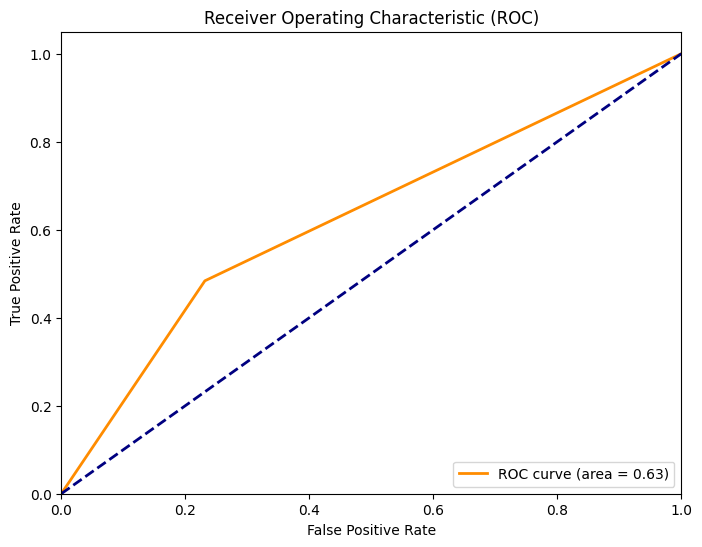

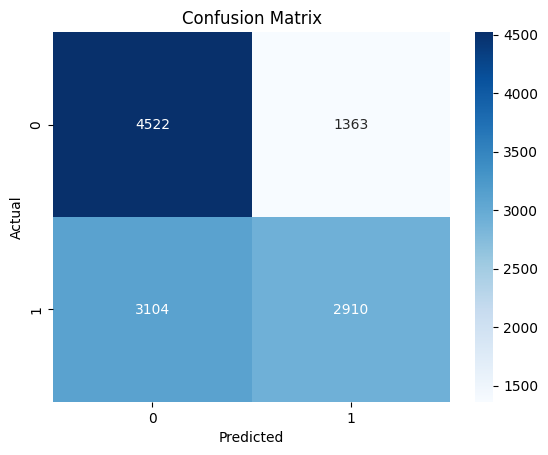

Training time: 6.968957901000977
Accuracy: 0.6245903017060257
Precision: 0.6810203604025274
Recall: 0.4838709677419355
F1 Score: 0.5657626130067074


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = LinearSVC(dual=False, multi_class='crammer_singer')
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time


y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC AUC and plot ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print training time, accuracy, precision, recall, and F1 score
print("Training time:", training_time)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = LinearSVC(dual=False, multi_class='crammer_singer')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

ensemble_model = DecisionTreeClassifier()
ensemble_input = pd.DataFrame({'Logistic': logistic_pred, 'KNN': knn_pred, 'SVM': svm_pred})
ensemble_model.fit(ensemble_input, y_test)
training_time = time.time() - start_time
ensemble_pred = ensemble_model.predict(ensemble_input)


decision_tree_accuracy = accuracy_score(y_test, ensemble_pred)
roc_auc = roc_auc_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred)
f1 = f1_score(y_test, ensemble_pred)

print(f"""
      

        Training time: {training_time}
        Accuracy: {accuracy}
        Precision: {precision})
        Recall: {recall})
        F1 Score: {f1})



""")

/home/tamim-pc/anaconda3/envs/work/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



      

        Training time: 8.334912538528442
        Accuracy: 0.6245903017060257
        Precision: 0.6423521296775306)
        Recall: 0.4838709677419355)
        F1 Score: 0.6306611360365698)






/home/tamim-pc/anaconda3/envs/work/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


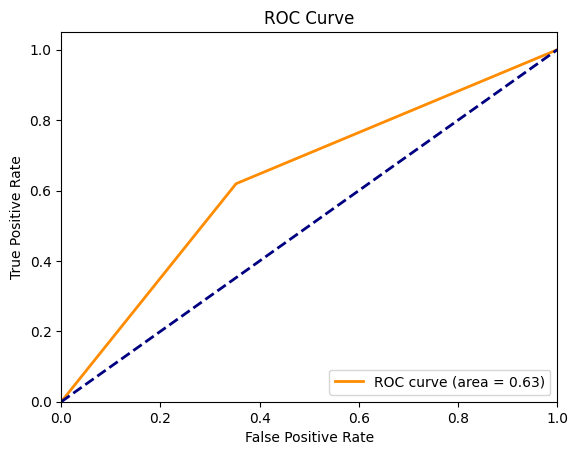

In [39]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

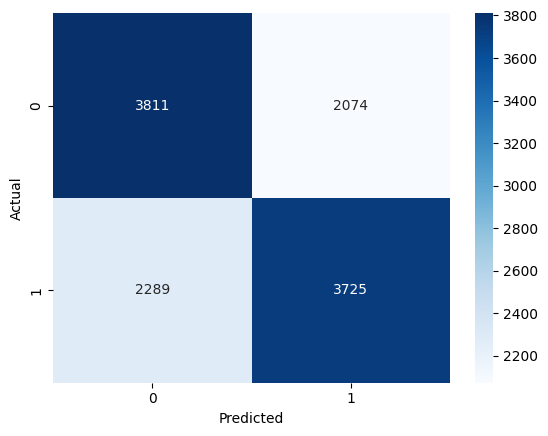

In [40]:
# Create the confusion matrix
confusion = confusion_matrix(y_test, ensemble_pred)

# Plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()